<div style="color: #095AAD; font-weight: bold; font-size: 16px;">

# Data Science Salary Analysis - Main Analysis</div>

This project explores how macroeconomic factors and public interest trends influence compensation patterns in the data science industry. By analyzing salary data alongside country-level economic indicators and Wikipedia page views for AI/ML topics, I aim to uncover the relationship between technological hype, economic development, and professional compensation.

Using three integrated datasets - 66,056 salary records, economic indicators for 95 countries, and Wikipedia trends for 5 key technology terms - I investigate whether media attention and economic conditions predict salary growth in tech fields.

**Research objective:**
To understand how workplace characteristics, public interest in AI/ML technologies, and country economic development affect data science compensation, providing evidence-based insights for professionals, companies, and policymakers in the tech industry.

<div style="color: #095AAD; font-weight: bold; font-size: 16px;">

## Dataset Descriptions</div>

**Salary Dataset:**
This dataset captures real-world salary data for jobs in Data Science, Artificial Intelligence, and Machine Learning from 2020 to 2025. Each row represents a reported salary, enriched with attributes like job title, experience level, company size, remote work ratio, and geographic context.

**Key columns:**
- `work_year`: Year salary was reported (2020-2025)
- `experience_level`: EN (Entry), MI (Midl), SE (Senior), EX (Executive)
- `employment_type`: FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)
- `job_title`: Specific position (Data Scientist, ML Engineer, etc.)
- `salary_in_usd`: Standardized salary in USD
- `remote_ratio`: 0 (On-site), 50 (Hybrid), 100 (Fully remote)
- `company_location`: Country code where company is located
- `company_size`: S (Small 1-50), M (Medium 51-500), L (Large 501+)

**World Bank Economic Indicators:**
Country-level economic data providing macroeconomic context for salary analysis.

**Key columns:**
- `country_code`: ISO country code (AD, AE, US, etc.)
- `country_name`: Full country name (Andorra, United States, etc.)
- `year`: Data year (2020-2025)
- `value_population`: Total population count
- `value_gdp_per_capita`: GDP per capita in current USD
- `value_education`: Percentage with Bachelor's degree or higher
- `value_internet`: Internet penetration rate (%)
  
**Wikipedia Page Views:**
Daily page view data for key AI/ML technology terms measuring public interest trends in English-speaking markets.

**Key columns:**
- `date`: Collection date (2020-01-01 to 2025-06-29)
- `keyword`: Technology term (chatgpt, ai, ml, dl, python)
- `views`: Daily page views count (English Wikipedia only)
- `category`: Technology category (AI, Programming)
- `period`: ChatGPT release period (before, after)

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### Importing required libraries</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

sns.set_style('whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### Data loading</div>

In [2]:
# Load all three datasets
salary_df = pd.read_csv('cleaned_salaries.csv')
worldbank_df = pd.read_csv('cleaned_worldbank.csv') 
wikipedia_df = pd.read_csv('wikipedia_data_complete.csv')

print('\nDataset shapes:\n')
print(f'Salary data: {salary_df.shape}')
print(f'World Bank data: {worldbank_df.shape}')
print(f'Wikipedia data: {wikipedia_df.shape}')


Dataset shapes:

Salary data: (66056, 9)
World Bank data: (564, 7)
Wikipedia data: (10035, 5)


<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### Data integration with economic indicators</div>

Integrating salary data with World Bank economic indicators by country and year to analyze how macroeconomic factors influence data science compensation.

In [3]:
# Merge salary data with World Bank indicators
df = salary_df.merge(
    worldbank_df, 
    left_on=['company_location', 'work_year'], 
    right_on=['country_code', 'year'], 
    how='left'
)

# Remove duplicate columns
df = df.drop(['country_code', 'year'], axis=1)

print(f'\nIntegrated dataset shape: {df.shape}\n')
df.head()


Integrated dataset shape: (66056, 14)



,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country_name,value_population,value_gdp_per_capita,value_education,value_internet
0,2025,MI,FT,Data Scientist,132600.0,US,100,US,M,United States,341454306.1,92481.07,39.16,94.22
1,2025,MI,FT,Data Scientist,102000.0,US,100,US,M,United States,341454306.1,92481.07,39.16,94.22
2,2025,SE,FT,Data Product Manager,260520.0,US,0,US,M,United States,341454306.1,92481.07,39.16,94.22
3,2025,SE,FT,Data Product Manager,140280.0,US,0,US,M,United States,341454306.1,92481.07,39.16,94.22
4,2025,SE,FT,Machine Learning Engineer,215000.0,US,0,US,M,United States,341454306.1,92481.07,39.16,94.22


<div style="color: #095AAD; font-weight: bold; font-size: 15px;">
    
### Data preprocessing: Converting categorical codes to descriptive labels</div>

To ensure clear and professional visualizations, we replace abbreviated categorical codes with their full descriptive names directly in the dataset. This approach eliminates the need for repetitive mapping operations in each chart and provides immediate data readability.

While this increases dataset size by approximately 2-3 MB, modern systems handle this easily, and the benefits significantly outweigh the minimal memory cost. Clean, self-documenting data improves both analysis workflow and dashboard presentation quality.

In [4]:
# Replace abbreviated codes with full descriptive names
df['company_size'] = df['company_size'].map({
   'S': 'Small', 'M': 'Medium', 'L': 'Large'
})
df['experience_level'] = df['experience_level'].map({
   'EN': 'Entry Level', 'MI': 'Mid Level', 'SE': 'Senior Level', 'EX': 'Executive Level'
})
df['employment_type'] = df['employment_type'].map({
   'FT': 'Full-time', 'PT': 'Part-time', 'CT': 'Contract', 'FL': 'Freelance'
})
df['remote_ratio'] = df['remote_ratio'].map({
   0: 'On-site', 50: 'Hybrid', 100: 'Fully Remote'
})

# Define orders for consistent visualization
company_size_order = ['Small', 'Medium', 'Large']
experience_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
employment_order = ['Full-time', 'Part-time', 'Contract', 'Freelance']
remote_order = ['On-site', 'Hybrid', 'Fully Remote']

print('\nCategorical columns updated with full names and orders defined!')


Categorical columns updated with full names and orders defined!


<div style="color: #095AAD; font-weight: bold; font-size: 16px;">
    
## Block 1: Workplace & Professional Factors</div>

Moving to the key stage — investigating the influence of corporate characteristics, specialist experience levels, and geography on salary levels in the Data Science field. This comprehensive analysis examines how organizational scale, remote work arrangements, career progression, and professional positioning impact compensation patterns to provide actionable insights for both professionals and employers in the data science ecosystem.

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">
    
### 1. How does company size affect salary levels?</div>

Analyzing salary differences across Small, Medium, and Large companies to understand the impact of organizational scale on salary policies.

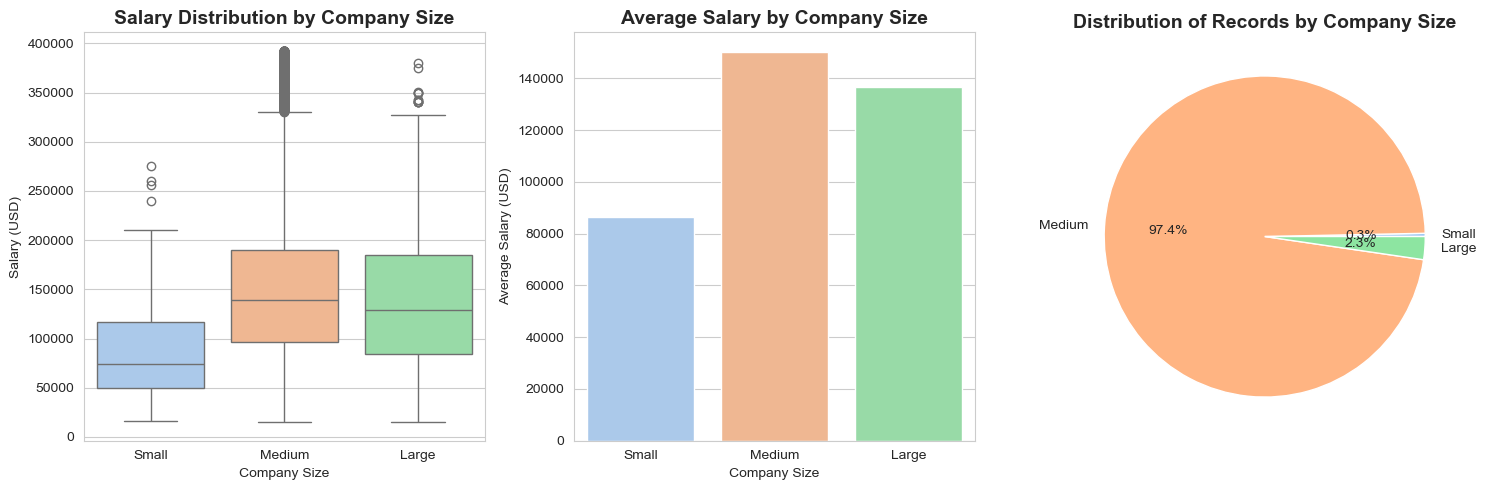

In [5]:
# Company size vs salary analysis
plt.figure(figsize=(15, 5))

# Use predefined order and colors
colors = sns.color_palette('pastel', len(company_size_order))

# Subplot 1: Box plot for distribution
plt.subplot(1, 3, 1)
sns.boxplot(
    data=df,
    x='company_size',
    y='salary_in_usd',
    order=company_size_order,
    palette=colors,
    fill=True
)
plt.title('Salary Distribution by Company Size', fontsize=14, fontweight='bold')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')

# Subplot 2: Average salary by company size
plt.subplot(1, 3, 2)
company_salary = df.groupby('company_size')['salary_in_usd'].mean().reindex(company_size_order).reset_index()
sns.barplot(
    data=company_salary,
    x='company_size',
    y='salary_in_usd',
    order=company_size_order,
    palette=colors
)
plt.title('Average Salary by Company Size', fontsize=14, fontweight='bold')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')

# Subplot 3: Count of records by company size
plt.subplot(1, 3, 3)
company_counts = df['company_size'].value_counts().reindex(company_size_order)
plt.pie(
    company_counts.values,
    labels=company_counts.index,
    autopct='%1.1f%%',
    colors=colors
)
plt.title('Distribution of Records by Company Size', fontsize=14, fontweight='bold')

plt.tight_layout();

**Key findings:** 

Almost 90% of the dataset comes from medium-sized companies, which is expected since large companies are globally rare and small companies don't always appear in such datasets. Medium companies show the highest average salaries, while small companies offer the lowest compensation. Large companies also provide solid salaries, but with fewer data points making the statistics less stable.

All company sizes demonstrate outliers above the upper quartile in the boxplots. Since extreme values were already cleaned, these likely represent rare but genuinely high-paying roles that add analytical value. The salary lower bounds are similar across all sizes, but upper ranges vary significantly - medium and large companies show substantially higher salary ceilings.

**Key insight:**
Medium-sized companies emerge as the sweet spot for Data Science professionals, offering both the highest average salaries and the greatest salary potential. For career advancement, targeting medium to large organizations provides the best salary opportunities compared to smaller firms.

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### 2. How does company size affect remote work types?</div>

We analyze the relationship between company size and the prevalence of different remote work arrangements (onsite, hybrid, remote) to test the hypothesis that larger companies tend to offer more hybrid or remote work options.

In [6]:
# Create pivot table 
remote_pivot = df.pivot_table(index='company_size', columns='remote_ratio', aggfunc='size', fill_value=0)
remote_pivot

remote_ratio,Fully Remote,Hybrid,On-site
company_size,,,
Large,349,203,973
Medium,15671,70,48576
Small,117,44,53


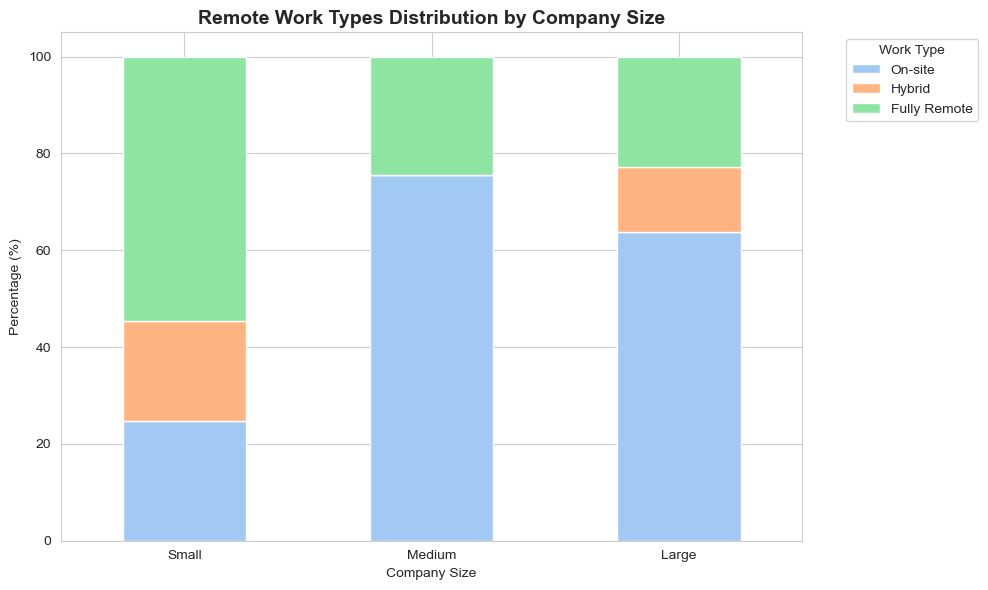

In [7]:
# Normalize table for stacked bar
remote_pivot_norm = remote_pivot.div(remote_pivot.sum(axis=1), axis=0) * 100
remote_pivot_norm = remote_pivot_norm.loc[company_size_order, remote_order]

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
remote_pivot_norm.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Remote Work Types Distribution by Company Size', fontsize=14, fontweight='bold')
plt.xlabel('Company Size')
plt.ylabel('Percentage (%)')
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout();

**Key findings:** 

Contrary to the widespread belief that IT professionals work predominantly remote, our analysis reveals a different picture in Data Science - office work still dominates the field across all company sizes.

Medium-sized companies show the strongest preference for office work, with approximately 75% of specialists working on-site. This suggests these organizations prioritize in-person collaboration and have established office infrastructure that supports traditional work models.

Large companies demonstrate the most balanced approach to work arrangements: roughly 35% remote, 50% office-based, and 15% hybrid formats. This flexibility likely reflects their robust infrastructure and mature remote work policies developed over years of operation.

Small companies surprisingly show higher remote work adoption compared to medium-sized firms - primarily startups with limited office budgets who find remote operations more cost-effective and scalable than maintaining physical workspace.

**Key insight:**
Company size significantly influences remote work culture in Data Science. While the industry hasn't fully embraced remote work as expected, larger organizations offer the most flexibility, making them attractive for professionals seeking work-life balance and location independence.

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### 3. Which Data Science positions are highest paid?

</div>

Identifying the most lucrative roles in the Data Science field to understand market premiums for specialized skills and leadership positions.

In [8]:
# Count total number of unique job titles
total_positions = df['job_title'].nunique()
print(f'\nTotal unique Data Science positions in dataset: {total_positions}\n')


Total unique Data Science positions in dataset: 397



In [9]:
# Get top 20 most frequent positions
top_20_positions = df['job_title'].value_counts().head(20).index

# Filter data for top 20 positions and calculate median salary
top_positions_salary = df[df['job_title'].isin(top_20_positions)].groupby('job_title')['salary_in_usd'].agg(['median', 'count']).reset_index()
top_positions_salary = top_positions_salary.sort_values('median', ascending=False).reset_index(drop=True)

print('\nTop 20 highest-paid Data Science positions:\n')
top_positions_salary


Top 20 highest-paid Data Science positions:



,job_title,median,count
0,Applied Scientist,184150.0,530
1,Research Scientist,179000.0,1284
2,Machine Learning Engineer,178000.0,3305
3,Product Manager,176785.0,1219
4,Research Engineer,176700.0,847
5,Software Engineer,167800.0,4564
6,Manager,157000.0,3322
7,Data Architect,153000.0,1153
8,AI Engineer,152000.0,1013
9,Engineer,150000.0,4045


In [10]:
# Check dataset coverage by top 20 positions
coverage = top_positions_salary['count'].sum()
total_records = len(df)
coverage_pct = (coverage / total_records) * 100
print(f'\nDataset coverage: {coverage:,} out of {total_records:,} records ({coverage_pct:.1f}%)\n')


Dataset coverage: 48,223 out of 66,056 records (73.0%)



**Key findings:** 

Our dataset contains approximately 400 different position titles in Data Science, yet the top 20 most frequent roles cover 73% of all records, indicating that other specializations are much rarer. For newcomers considering this field, it's advisable to focus on these top 20 positions as they represent the main industry trends and opportunities.

Research roles dominate the salary rankings: Applied Scientist, Research Scientist, and Research Engineer lead with salaries of 176-184K USD. Machine Learning and AI specializations are also highly valued, with ML Engineers and AI Engineers earning around 150-178K USD.

A notable paradox emerges: classic Data Scientists and Data Engineers, despite high demand (6,779 and 6,653 records respectively), earn less at around 136-142K USD compared to specialized roles.

Management positions (Product Manager, Manager) offer strong compensation (157-177K USD) but require significant experience. Analytics roles (Data Analyst, Analyst) represent entry-level positions with the lowest salaries (95-105K USD).

**Key insight:**

To accelerate career growth and maximize earnings, it's better to specialize directly in ML/AI or research roles rather than starting as an analyst.

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### 4. Which positions show highest salary growth 2020-2025?</div>

Calculating compound annual growth rate (CAGR) using linear regression to identify the fastest-growing professions and emerging trends in Data Science compensation. Linear regression provides more robust trend analysis by considering all years rather than just endpoint comparison.

In [11]:
# Get positions with sufficient data (minimum 20 records)
position_counts = df['job_title'].value_counts()
valid_positions = position_counts[position_counts >= 20].index

cagr_results = []
for position in valid_positions:
   position_data = df[df['job_title'] == position]
   
   # Prepare data for logarithmic regression
   years = position_data['work_year'].values.reshape(-1, 1)
   log_salaries = np.log(position_data['salary_in_usd'].values)
   
   if len(np.unique(years)) >= 3:  # Need at least 3 different years
       model = LinearRegression()
       model.fit(years, log_salaries)
       
       # Convert coefficient to annual growth percentage
       avg_salary = position_data['salary_in_usd'].mean()
       annual_growth_rate = (np.exp(model.coef_[0]) - 1) * 100
       
       cagr_results.append({
           'job_title': position,
           'avg_salary': round(avg_salary, 0),
           'cagr_percent': round(annual_growth_rate, 2)
       })

# Convert to DataFrame and sort by CAGR
cagr_log = pd.DataFrame(cagr_results)
cagr_log = cagr_log.sort_values('cagr_percent', ascending=False).reset_index(drop=True)

print('\nTop 15 fastest growing Data Science positions by CAGR:\n')
cagr_log.head(15)


Top 15 fastest growing Data Science positions by CAGR:



,job_title,avg_salary,cagr_percent
0,Machine Learning Developer,116045.0,28.02
1,Machine Learning Infrastructure Engineer,172604.0,26.79
2,Computer Vision Engineer,173281.0,26.57
3,AI Scientist,161233.0,26.39
4,Insight Analyst,81684.0,24.23
5,Machine Learning Researcher,183575.0,18.33
6,Data Operations Specialist,88812.0,14.46
7,Data Product Owner,136428.0,13.81
8,Data Operations Manager,164933.0,11.40
9,Research Engineer,193600.0,9.97


**Key findings:** 

The data reveals a clear hierarchy of salary growth trends across Data Science positions. 

Explosive growth (24-28%) dominates new ML specializations - ML Developer, ML Infrastructure Engineer, Computer Vision Engineer, and AI Scientist represent the hottest roles with significant talent shortages.

Strong growth positions (14-18%) include Insight Analyst and ML Researcher, reflecting increasing demand for analytical insights and research capabilities. 

Moderate growth (7-11%) characterizes operational roles like Data Operations and MLOps Engineer, plus the classic ML Engineer role, indicating market stabilization.

Established positions show slow growth (4-6%) - Research Scientist, BI Developer, and Data Quality Analyst represent mature professions with limited salary acceleration.

**Key insight:** 

The market clearly divides into explosive-growth emerging ML/AI specializations versus stable traditional roles. For maximum salary growth potential, professionals should target emerging ML/AI directions rather than established data science positions.

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### 5. Which employment type dominates in Data Science?</div>

I analyze employment type distribution (full-time, part-time, contract, freelance) across Data Science positions. This is highly relevant for understanding modern labor market trends — including the prevalence of gig economy roles and the share of non-traditional employment arrangements.

In [12]:
# Count and percentage of each employment type
employment_counts = df['employment_type'].value_counts()
employment_percentages = df['employment_type'].value_counts(normalize=True) * 100

# Combine into one DataFrame
employment_summary = pd.DataFrame({
    'Count': employment_counts,
    'Percentage': employment_percentages.round(2)
})
print('\nEmployment Type Summary:\n')
employment_summary


Employment Type Summary:



,Count,Percentage
employment_type,,
Full-time,65376,98.97
Contract,347,0.53
Part-time,317,0.48
Freelance,16,0.02


In [13]:
# Employment type analysis across Data Science positions
# Get top 15 most common positions for analysis
top_15_positions = df['job_title'].value_counts().head(15).index
df_top_positions = df[df['job_title'].isin(top_15_positions)]

# Create employment type distribution by position
employment_distribution = df_top_positions.groupby(['job_title', 'employment_type']).size().unstack(fill_value=0)
employment_percentage = employment_distribution.div(employment_distribution.sum(axis=1), axis=0) * 100

# Sort by full-time percentage (descending)
employment_percentage = employment_percentage.sort_values('Full-time', ascending=False)
print('\nEmployment type distribution for top 15 Data Science positions (%):\n')
employment_percentage.round(2)


Employment type distribution for top 15 Data Science positions (%):



employment_type,Contract,Freelance,Full-time,Part-time
job_title,,,,
Analytics Engineer,0.00,0.00,100.00,0.00
Product Manager,0.00,0.00,100.00,0.00
Research Engineer,0.00,0.00,100.00,0.00
Manager,0.21,0.00,99.76,0.03
Machine Learning Engineer,0.39,0.03,99.49,0.09
Associate,0.18,0.00,99.38,0.44
Data Scientist,0.28,0.03,99.13,0.56
AI Engineer,0.79,0.00,99.11,0.10
Research Scientist,0.16,0.00,99.07,0.78


**Key findings:**

Data Science demonstrates overwhelming dominance of full-time employment - 98.97% of all positions are full-time roles. Contract, part-time, and freelance arrangements each represent less than 1% of the market, indicating minimal flexibility in employment structures.

The most stable roles show 100% full-time employment: Analytics Engineer, Product Manager, and Research Engineer require complete organizational integration. Slightly more flexibility appears in traditional analytical positions: Data Analyst (1.28% contracts), Analyst (1.05% contracts), and Data Architect/Engineer (~0.5% alternative arrangements).

**Key insights:** 

The Data Science industry strongly favors permanent employment over flexible work arrangements, with freelance work virtually non-existent (0.02%). This distinguishes the field from other IT sectors where gig economy thrives, suggesting employers prioritize sustained relationships with data specialists due to complex domain knowledge requirements and strategic importance of data science initiatives.

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### 6. How does experience level affect remote work opportunities?</div>

I analyze how seniority affects remote work opportunities and preferences across different experience levels (Entry, Mid, Senior, Executive) to understand whether autonomy and trust correlate with professional experience.

In [14]:
# Calculate counts and percentages
exp_counts = df['experience_level'].value_counts().reindex(experience_order)
exp_percent = (exp_counts / exp_counts.sum() * 100).round(2)

# Combine into a summary DataFrame
exp_summary = pd.DataFrame({
   'Count': exp_counts,
   'Percentage': exp_percent
})
exp_summary

,Count,Percentage
experience_level,,
Entry Level,7542,11.42
Mid Level,21364,32.34
Senior Level,34740,52.59
Executive Level,2410,3.65


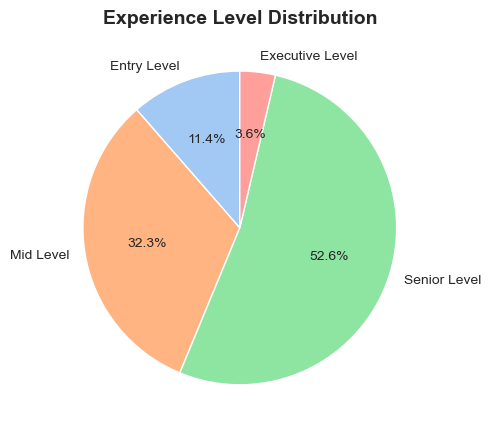

In [15]:
plt.figure(figsize=(5, 5))
plt.pie(
   exp_summary['Percentage'],
   labels=experience_order,
   autopct='%1.1f%%',
   startangle=90,
   colors=sns.color_palette('pastel')
)
plt.title('Experience Level Distribution', fontsize=14, fontweight='bold')
plt.tight_layout();

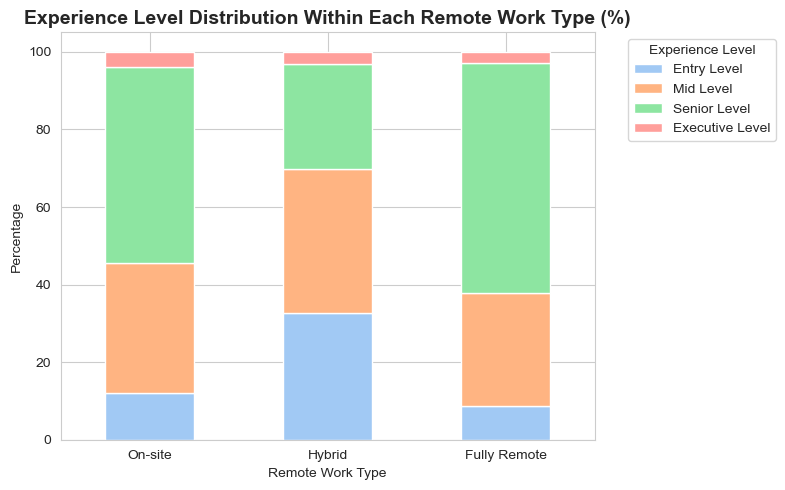

In [16]:
# Crosstab: experience level within each remote type
remote_exp_split = pd.crosstab(df['remote_ratio'], df['experience_level'])
remote_exp_pct = remote_exp_split.div(remote_exp_split.sum(axis=1), axis=0) * 100
remote_exp_pct = remote_exp_pct.loc[remote_order, experience_order]

remote_exp_pct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Experience Level Distribution Within Each Remote Work Type (%)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage')
plt.xlabel('Remote Work Type')
plt.xticks(rotation=0)
plt.legend(title='Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout();

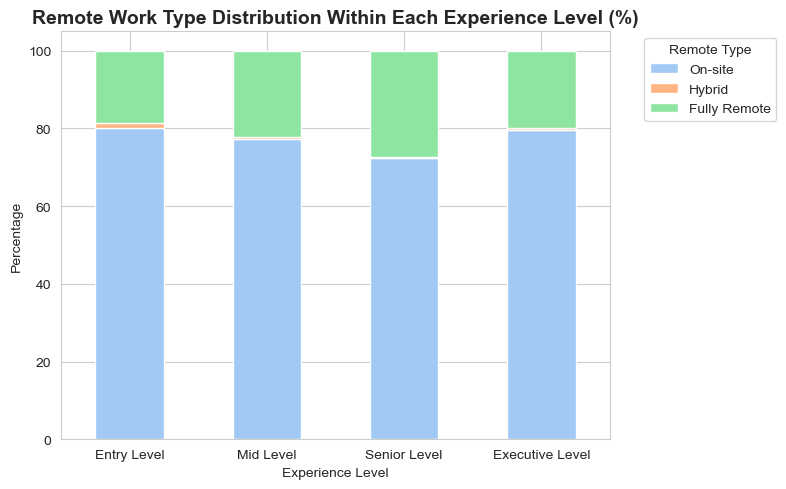

In [17]:
# Crosstab: remote_type within each experience level
exp_remote_split = pd.crosstab(df['experience_level'], df['remote_ratio'])
exp_remote_pct = exp_remote_split.div(exp_remote_split.sum(axis=1), axis=0) * 100
exp_remote_pct = exp_remote_pct.reindex(experience_order)[remote_order]

exp_remote_pct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Remote Work Type Distribution Within Each Experience Level (%)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage')
plt.xlabel('Experience Level')
plt.xticks(rotation=0)
plt.legend(title='Remote Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout();

**Key findings:** 

Senior-level professionals represent nearly half of all dataset records. This is due to the dataset's unique characteristic: it aggregates data from 2020 to 2025, with each record reflecting a unique combination of country, work location, experience level, and job title. Thus, the high proportion of Seniors reflects diversity in roles and locations rather than actual market distribution.

Remote work is dominated by experienced professionals — around 60% of all remote employees are Senior-level, who also form the majority among onsite employees, showing high trust and autonomy granted to senior specialists. Executives show roughly equal distribution among onsite, hybrid, and remote work, reflecting both high autonomy and close business involvement.

Entry-level professionals have the lowest share of remote work, reflecting their need for support and supervision early in their careers. Hybrid work remains below 2% across all experience levels, suggesting this format is generally unpopular or underutilized. Regardless of experience level, onsite work is preferred for better team integration and project involvement.

**Key insights:** 

Mid-level professionals lead in hybrid roles, which may reflect their transitional position — experienced enough to benefit from flexibility but still closely connected to team structures. 

Entry-level roles are overwhelmingly onsite, emphasizing the importance of in-person onboarding, training, and supervision. 

Executives are evenly spread across work types, but their low numbers reflect the specialized nature of their roles.

Hybrid work is underused across all levels, indicating potential to expand flexible options, especially for mid-level talent.

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### 7. Do large companies pay more as most people expect?</div>

There's a widespread belief that executives in large corporations earn the highest salaries due to company resources and prestige. I will test this assumption using Executive-level professionals to see if size really determines top-tier compensation.

**Hypothesis Testing:**
- H₀: Executive professionals in Large companies earn more than Executive professionals in Medium companies
- H₁: Executive professionals in Large companies do NOT earn more than Executive professionals in Medium companies

I will use a two-sample t-test to compare mean salaries between Executive_Large and Executive_Medium groups and determine if there are statistically significant differences.

In [18]:
# Extract salary data
exec_large = df[(df['experience_level'] == 'Executive Level') & (df['company_size'] == 'Large')]['salary_in_usd']
exec_medium = df[(df['experience_level'] == 'Executive Level') & (df['company_size'] == 'Medium')]['salary_in_usd']

# Perform one-tailed t-test (checking if Large > Medium)
t_statistic, p_value = ttest_ind(exec_large, exec_medium, alternative='greater')

print(f'\nT-test results:')
print(f'T-statistic: {t_statistic:.3f}')
print(f'P-value: {p_value:.6f}')

# Evaluate result
if p_value < 0.05:
    print('\nRESULT: We REJECT H₀ → Large companies DO pay more.')
    print('There is statistically significant evidence that Executive professionals in large companies earn more than in medium ones.')
else:
    print('\nRESULT: We FAIL TO REJECT H₀ → Large companies do NOT consistently pay more.')
    print('There is no statistically significant evidence that Executive professionals in large companies earn more.')


T-test results:
T-statistic: -2.526
P-value: 0.994203

RESULT: We FAIL TO REJECT H₀ → Large companies do NOT consistently pay more.
There is no statistically significant evidence that Executive professionals in large companies earn more.


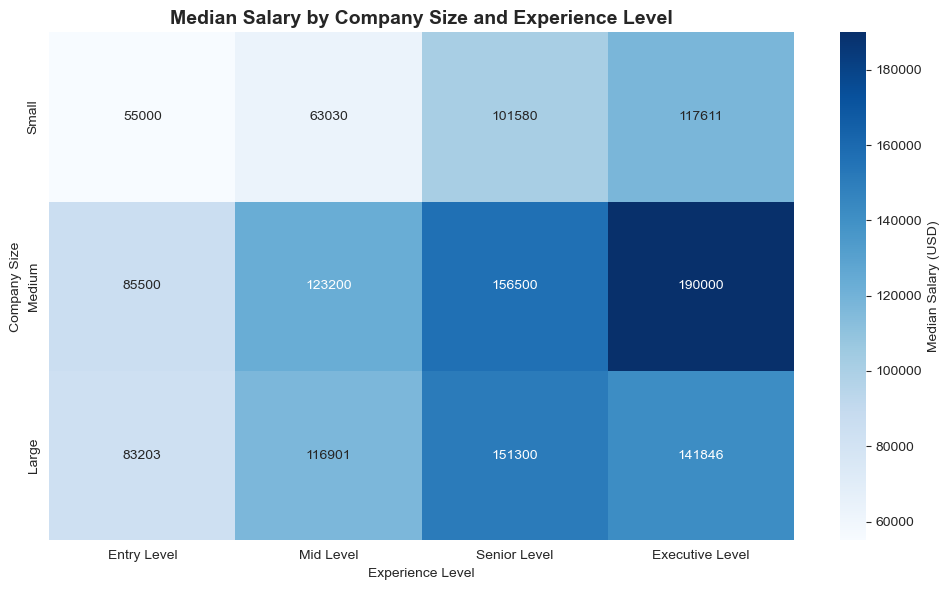

In [19]:
# Create pivot table for median salary by company size and experience level
salary_pivot = df.pivot_table(
    values='salary_in_usd',
    index='company_size',
    columns='experience_level',
    aggfunc='median',
    fill_value=0
).round(0)

# Reorder rows and columns for logical display
salary_pivot = salary_pivot.reindex(index=company_size_order, columns=experience_order)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    salary_pivot,
    annot=True,
    fmt='.0f',
    cmap='Blues',
    cbar_kws={'label': 'Median Salary (USD)'}
)
plt.title('Median Salary by Company Size and Experience Level', fontsize=14, fontweight='bold')
plt.xlabel('Experience Level')
plt.ylabel('Company Size')
plt.tight_layout();

**Key findings:** 

Contrary to common belief, Executive-level professionals receive higher median salaries in Medium-sized companies than in Large ones. This trend holds across all experience levels: Medium companies consistently offer the highest pay, while Small companies rank lowest.

The salary gap is especially notable at the Executive level, where Medium companies pay nearly 20% more than Large firms. This may reflect greater salary flexibility in Medium organizations, while Large companies often have rigid grading structures. Executive professionals in Medium companies likely play a more central role in business outcomes, which is rewarded with higher compensation.

**Key insights:** 

Medium-sized companies may represent a "sweet spot" - offering both financial capacity and flexibility to attract top talent. Large firms may need to rethink standardized pay bands to stay competitive in retaining senior professionals.

Strategic career growth can involve starting in a Large company for structure and training, then transitioning to a Medium one for better pay and autonomy. 

The data highlights how organizational size affects not only compensation but also the professional influence and visibility of Executive-level roles.

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### 8. Which positions offer the best salary growth from entry to senior level? </div>

I analyze career progression potential by calculating salary growth rates across senior levels for different Data Science positions to identify the most lucrative career tracks.

In [20]:
# Career progression analysis: Overall Entry to Senior growth across all periods
def calculate_overall_entry_to_senior_growth(df, min_records=10):
   growth_results = []
   
   for position in df['job_title'].unique():
       # Get all Entry and Senior level data across all years
       entry_salaries = df[(df['job_title'] == position) & (df['experience_level'] == 'Entry Level')]['salary_in_usd']
       senior_salaries = df[(df['job_title'] == position) & (df['experience_level'] == 'Senior Level')]['salary_in_usd']
       
       # Only include positions with sufficient data at both levels
       if len(entry_salaries) >= min_records and len(senior_salaries) >= min_records:
           entry_mean = entry_salaries.mean()
           senior_mean = senior_salaries.mean()
           
           # Calculate growth rate from Entry to Senior
           growth_rate = ((senior_mean - entry_mean) / entry_mean) * 100
           
           growth_results.append({
               'job_title': position,
               'entry_salary': round(entry_mean, 0),
               'senior_salary': round(senior_mean, 0),
               'growth_rate_%': round(growth_rate, 1)
           })
   
   return pd.DataFrame(growth_results)

# Calculate overall Entry to Senior career growth
career_growth = calculate_overall_entry_to_senior_growth(df, min_records=10)
career_growth = career_growth.sort_values('growth_rate_%', ascending=False).reset_index(drop=True)
print('\nTop 15 positions with highest career growth potential (Entry to Senior):\n')
career_growth.head(15)


Top 15 positions with highest career growth potential (Entry to Senior):



,job_title,entry_salary,senior_salary,growth_rate_%
0,Data Governance,58272.0,157660.0,170.6
1,AI Scientist,68489.0,184091.0,168.8
2,Software Developer,69424.0,152704.0,120.0
3,Researcher,89671.0,184511.0,105.8
4,Site Reliability Engineer,98758.0,195718.0,98.2
5,AI Engineer,89317.0,176905.0,98.1
6,Data Specialist,62711.0,118782.0,89.4
7,AI Developer,86936.0,162215.0,86.6
8,Data Engineer,86950.0,157088.0,80.7
9,Engineer,102198.0,177666.0,73.8


In [21]:
# Additional analysis: Top 10 highest-paid Senior positions in 2025
senior_2025 = df[(df['experience_level'] == 'Senior Level') & (df['work_year'] == 2025)]
top_senior_2025 = senior_2025.groupby('job_title')['salary_in_usd'].agg(['mean', 'count']).round(0).reset_index()
top_senior_2025 = top_senior_2025[top_senior_2025['count'] >= 5]  # Minimum 5 records
top_senior_2025.columns = ['job_title', 'avg_salary', 'count']
top_senior_2025 = top_senior_2025.sort_values('avg_salary', ascending=False).head(15).reset_index(drop=True)
print('\nTop 15 highest-paid Senior positions in 2025:\n')
top_senior_2025[['job_title', 'avg_salary']].head(15)


Top 15 highest-paid Senior positions in 2025:



,job_title,avg_salary
0,Engineering Manager,247674.0
1,Machine Learning Architect,242180.0
2,Director,238605.0
3,AI Researcher,216989.0
4,Account Executive,213286.0
5,AI Architect,208604.0
6,Research Engineer,207934.0
7,Machine Learning Engineer,207025.0
8,Tech Lead,205893.0
9,Principal Researcher,205350.0


**Key findings:**

Data Governance leads career progression with exceptional 170.6% salary growth from entry to senior level (58K USD to 158K USD), followed closely by AI Scientist at 168.8% growth (68K to 184K USD). These emerging specializations significantly outperform traditional roles.

Software Developer shows strong 120% growth, while technical research positions (Researcher, Site Reliability Engineer, AI Engineer) demonstrate solid 86–105% advancement potential. Classic Data Science roles such as Data Engineer (80.7%) and Data Scientist (71.6%) show more moderate growth, reflecting market maturation.

This is further confirmed by the ranking of top-paying senior positions: AI-focused roles (Machine Learning Architect, AI Researcher, AI Engineer) dominate the top of the salary spectrum, alongside technical leadership and architecture roles.

**Key insights:** 

New specialized roles in data governance and AI not only show the highest salary growth from junior to senior level, but also lead in absolute compensation among senior professionals. This double advantage suggests a clear strategic direction: for those seeking both fast progression and high earning potential, AI, governance, and research engineering represent the most lucrative paths.

Traditional data science jobs remain stable and respectable, but they no longer provide the explosive growth or peak earnings seen in newer, more specialized disciplines. The landscape is shifting — and those who pivot early toward high-impact AI or governance roles may capture the strongest long-term benefits.

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### 9. Which countries hire the most remote specialists from abroad?</div>

I analyze the digital nomad phenomenon in Data Science - professionals working for companies in one country while residing in another. Which countries most frequently hire remote specialists from abroad, and which locations are popular for living while working for foreign companies?

In [22]:
# Extract unique pairs of company location and country name
country_map = (
    df[['company_location', 'country_name']]
    .drop_duplicates()
    .set_index('company_location')['country_name']
    .to_dict()
)

In [23]:
# Filter Digital Nomads
digital_nomads = df[df['employee_residence'] != df['company_location']].copy()

# Count by residence countries
residence_counts = (
   digital_nomads['employee_residence']
   .value_counts()
   .head(10)
   .rename_axis('country_code')
   .reset_index(name='remote_workers')
)

# Count by company countries
company_counts = (
   digital_nomads['company_location']
   .value_counts()
   .head(10)
   .rename_axis('country_code')
   .reset_index(name='jobs_offered')
)

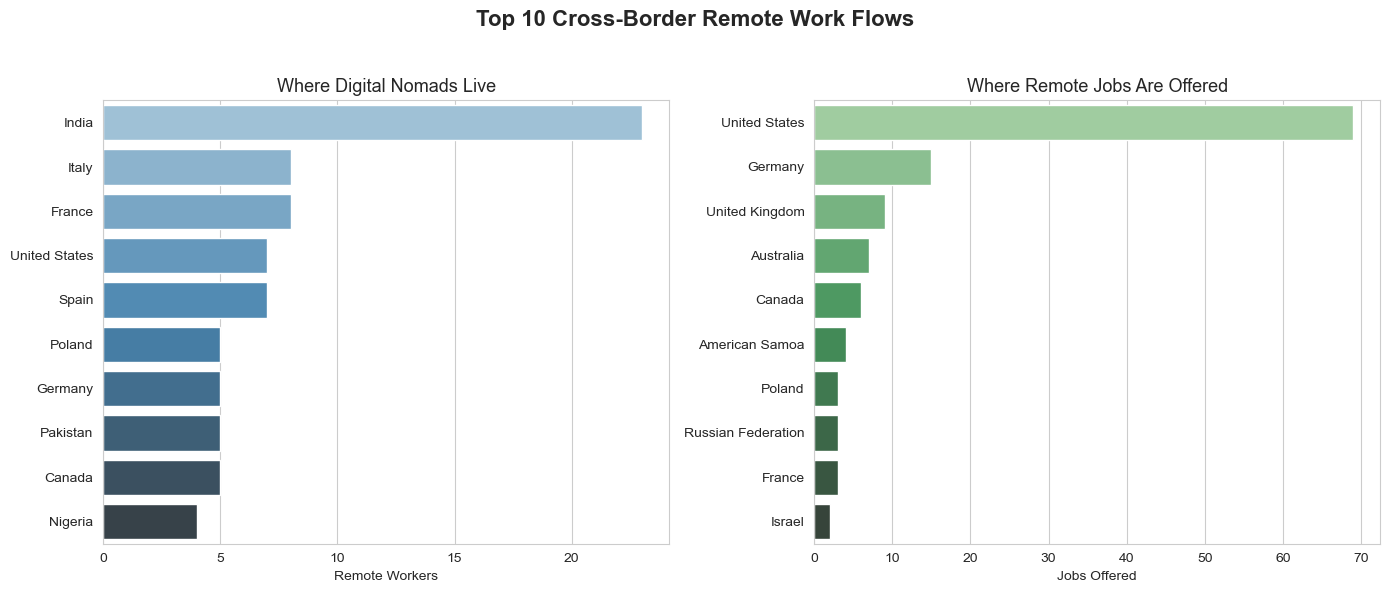

In [24]:
plt.figure(figsize=(14, 6))
plt.suptitle('Top 10 Cross-Border Remote Work Flows', fontsize=16, fontweight='bold')

# Subplot 1: Where they live
plt.subplot(1, 2, 1)
sns.barplot(
    data=residence_counts,
    y=residence_counts['country_code'].map(country_map),
    x='remote_workers',
    palette='Blues_d'
)
plt.title('Where Digital Nomads Live', fontsize=13)
plt.xlabel('Remote Workers')
plt.ylabel('')

# Subplot 2: Where they work
plt.subplot(1, 2, 2)
sns.barplot(
    data=company_counts,
    y=company_counts['country_code'].map(country_map),
    x='jobs_offered',
    palette='Greens_d'
)
plt.title('Where Remote Jobs Are Offered', fontsize=13)
plt.xlabel('Jobs Offered')
plt.ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Key findings:** 

Remote work patterns in Data Science show clear trends. India leads as the residence location for remote specialists, followed by Italy and other countries with favorable cost-of-living and IT infrastructure ratios.

The United States dominates as the primary employer for international remote specialists, followed by Germany, United Kingdom, Australia, and Canada. These countries offer high salaries and developed remote work policies.

**Key insights:** 

A beneficial arrangement emerges - specialists from countries with lower living costs receive high salaries from companies in developed nations while maintaining excellent purchasing power at home. Companies gain access to global talent pools, while workers optimize their income and quality of life.

Most hiring occurs in English-speaking countries and major European economies, highlighting the importance of language and regulatory factors. For data science specialists, this represents an opportunity to strategically choose their living location while accessing high-paying international positions.

<div style="color: #095AAD; font-weight: bold; font-size: 16px;">

## Block 2: Economic Factors Impact

</div>

Moving to the crucial stage - investigating how macroeconomic factors influence Data Science salaries. I will explore the relationship between country-level economic indicators (GDP per capita, education rates, economic development) and tech specialist salaries to understand whether national prosperity translates into higher individual earnings in the data science field.

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">

### 10. Do countries with GDP >$50k pay 20%+ more in Data Science?</div>

There's a widespread belief that economically developed countries with high GDP per capita offer significantly higher salaries in tech fields. I will test this assumption using our comprehensive salary dataset.

**Hypothesis Testing:**
- H₀: Countries with GDP per capita >50k USD pay the same or less than 20% more compared to countries with GDP ≤50k USD
- H₁: Countries with GDP per capita >50k USD pay significantly more than 20% compared to countries with GDP ≤50k USD
 
I will use a two-sample t-test to compare mean salaries between high GDP and low GDP country groups and calculate the actual percentage difference.

In [25]:
# Extract salary data (assuming economic data already merged)
high_gdp_salaries = df[df['value_gdp_per_capita'] > 50000]['salary_in_usd'].dropna()
low_gdp_salaries = df[df['value_gdp_per_capita'] <= 50000]['salary_in_usd'].dropna()

# Calculate actual percentage difference
actual_difference = ((high_gdp_salaries.mean() - low_gdp_salaries.mean()) / low_gdp_salaries.mean()) * 100

# Perform one-tailed t-test (checking if High GDP > Low GDP by 20%+)
t_statistic, p_value = ttest_ind(high_gdp_salaries, low_gdp_salaries, alternative='greater')

print(f'\nT-test results:')
print(f'T-statistic: {t_statistic:.3f}')
print(f'P-value: {p_value:.6f}')

# Evaluate result
if p_value < 0.05 and actual_difference >= 20:
    print('\nRESULT: We REJECT H₀ → High GDP countries DO pay significantly more.')
    print('There is statistically significant evidence that countries with GDP >$50k pay 20%+ more for Data Science roles.')
else:
    print('\nRESULT: We FAIL TO REJECT H₀ → High GDP advantage is not proven.')
    print('There is insufficient evidence that countries with GDP >$50k consistently pay 20%+ more.')


T-test results:
T-statistic: 59.649
P-value: 0.000000

RESULT: We REJECT H₀ → High GDP countries DO pay significantly more.
There is statistically significant evidence that countries with GDP >$50k pay 20%+ more for Data Science roles.


<div style="color: #095AAD; font-weight: bold; font-size: 15px;">
    
### Additional analysis: Correlation between salaries and macroeconomic indicators</div>

To understand the broader relationship between economic development and Data Science compensation, I analyze correlations between salaries and all available macroeconomic indicators: population, GDP per capita, education levels, and internet accessibility.

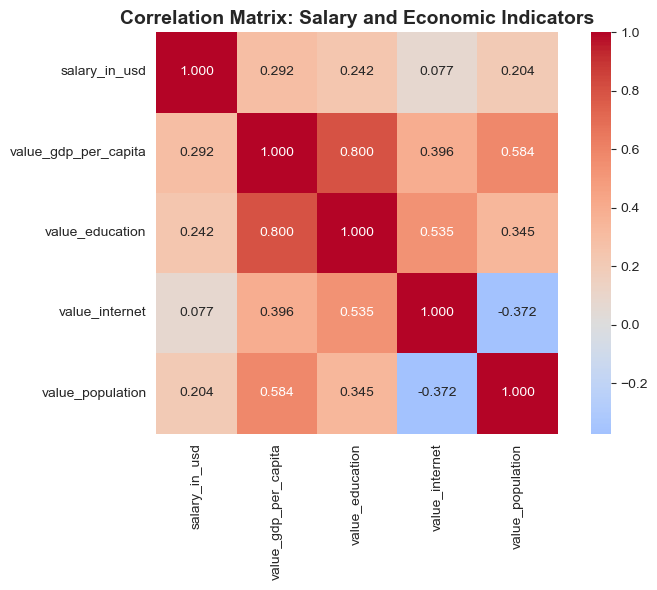

In [26]:
# Select numeric economic indicators for correlation analysis
numeric_cols = ['salary_in_usd', 'value_gdp_per_capita', 'value_education', 'value_internet', 'value_population']
df_numeric = df[numeric_cols].dropna()

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.3f')
plt.title('Correlation Matrix: Salary and Economic Indicators', fontsize=14, fontweight='bold')
plt.tight_layout();

**Key findings:**

Statistical analysis confirms the economic development hypothesis: countries with GDP per capita >$50k pay significantly more than 20% for Data Science roles. This represents strong evidence that national economic prosperity directly translates into higher individual tech earnings.

Strong interdependencies exist among economic indicators: GDP and education are highly correlated (r=0.800), confirming that wealthier nations invest more in human capital. However, larger populations correlate with lower internet penetration (r=-0.372), suggesting infrastructure challenges in populous countries.

Correlation analysis reveals GDP per capita as the strongest predictor of Data Science salaries (r=0.292), followed by education levels (r=0.242) and population size (r=0.204). Surprisingly, internet accessibility shows almost no correlation with salaries (r=0.077), challenging common assumptions about digital economy drivers.

**Key insights:**

The data reveals a clear connection between country wealth and Data Science salaries - professionals should target high-GDP countries for maximum earnings. Education levels in a country are almost as important as economic development, showing that nations investing in education pay more.

Surprisingly, internet quality barely affects salaries. This means basic internet exists everywhere that hires Data Science specialists. What matters most is overall country wealth and education levels, not internet speed.

For career strategy, this suggests a simple approach: work remotely for wealthy countries while living in cheaper but educated locations. This way you can earn high salaries while spending less on living costs.

<div style="color: #095AAD; font-weight: bold; font-size: 16px;">
    
## Block 3: AI Revolution Impact</div>

Moving to the revolutionary analysis - investigating how ChatGPT's release (November 30, 2022) transformed both public interest in AI technologies and Data Science salary patterns. This analysis tests whether technological breakthroughs and media hype cycles translate into real salary growth for data professionals.

The emergence of ChatGPT marked a watershed moment in AI accessibility, potentially reshaping how society views artificial intelligence and creating new demand for AI/ML specialists. We examine whether this paradigm shift correlates with measurable changes in Data Science market dynamics.

**Research hypothesis:** ChatGPT's release significantly increased both public interest in AI technologies (measured via Wikipedia searches) and Data Science salaries, demonstrating how technological breakthroughs drive market salaries.

**Analysis approach:**
1. **Data preparation:** Extrapolate incomplete 2025 Wikipedia data using daily averages to ensure statistical validity across comparison periods
2. **Period comparison:** Analyze Wikipedia search trends and salary patterns before (2020-2022) versus after (2023-2025) ChatGPT release
3. **Multi-dimensional analysis:** Examine both aggregate trends and experience-level breakdown to identify where impact was strongest
4. **Correlation assessment:** Determine whether increased AI interest correlates with salary growth patterns

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">
    
### 1. Extrapolating incomplete 2025 Wikipedia data</div>

Since our Wikipedia dataset contains only partial 2025 data (180 days), we extrapolate annual figures using daily averages to maintain statistical comparability with complete years.

In [27]:
# Convert date column to datetime format
wikipedia_df['date'] = pd.to_datetime(wikipedia_df['date'])

# Check 2025 data completeness and extrapolate
wiki_2025 = wikipedia_df[wikipedia_df['date'].dt.year == 2025]
print(f'2025 data: from {wiki_2025["date"].min()} to {wiki_2025["date"].max()}')

days_available = wiki_2025['date'].nunique()
print(f'Available days: {days_available}')

# Extrapolate to full year (365 days in 2025)
daily_avg = wiki_2025.groupby('keyword')['views'].sum() / days_available
wiki_2025_adjusted = daily_avg * 365

print(f'Using extrapolation: daily average * 365')
print(f'\nExtrapolated 2025 annual views:')
wiki_2025_adjusted.round(0)

2025 data: from 2025-01-01 00:00:00 to 2025-06-29 00:00:00
Available days: 180
Using extrapolation: daily average * 365

Extrapolated 2025 annual views:


keyword
ai          8678925.0
chatgpt    44811520.0
dl           824304.0
ml          1944116.0
python      4110748.0
Name: views, dtype: float64

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">
    
### 2. Creating annual summary table for analysis</div>

Building a comprehensive matrix with keywords as rows, years as columns, and total annual page views at intersections. This table will serve as the foundation for before/after ChatGPT comparison.

In [28]:
# Create annual summary table: keywords x years
# First, exclude partial 2025 data to avoid duplicates
wiki_without_2025 = wikipedia_df[wikipedia_df['date'].dt.year != 2025]

# Group by year and keyword for complete years
wiki_annual_summary = wiki_without_2025.groupby([wiki_without_2025['date'].dt.year, 'keyword'])['views'].sum().reset_index()
wiki_annual_summary.columns = ['year', 'keyword', 'annual_views']

# Add extrapolated 2025 data
for term in ['ai', 'ml', 'dl', 'python', 'chatgpt']:
    if term in wiki_2025_adjusted.index:
        new_row = pd.DataFrame({
            'year': [2025],
            'keyword': [term], 
            'annual_views': [int(wiki_2025_adjusted[term])]
        })
        wiki_annual_summary = pd.concat([wiki_annual_summary, new_row], ignore_index=True)

# Pivot to create matrix: keywords as rows, years as columns
wiki_matrix = wiki_annual_summary.pivot(index='keyword', columns='year', values='annual_views').fillna(0)

print('\nAnnual Wikipedia Views Matrix (Keywords x Years):\n')
wiki_matrix


Annual Wikipedia Views Matrix (Keywords x Years):



year,2020,2021,2022,2023,2024,2025
keyword,,,,,,
ai,3429230,4185260,6766801,10569358,8783850,8678925
chatgpt,0,0,1998384,61667781,21425184,44811520
dl,972118,947466,833308,901506,801730,824303
ml,1799644,1758222,1852363,2227457,2127717,1944115
python,3434807,3515627,3661483,3913747,4719086,4110747


<div style="color: #095AAD; font-weight: bold; font-size: 15px;">
    
### 3. Traditional AI technologies impact analysis</div>

Analyzing how established AI/ML technologies (AI, ML, DL, Python) influenced Data Science salaries by comparing 2020-2022 vs 2023-2025 periods.

In [29]:
# Analysis 1: Traditional AI technologies impact
traditional_terms = ['ai', 'ml', 'dl', 'python']

# Traditional AI interest before/after ChatGPT
traditional_before = wiki_matrix.loc[traditional_terms, [2020, 2021, 2022]].mean(axis=1)
traditional_after = wiki_matrix.loc[traditional_terms, [2023, 2024, 2025]].mean(axis=1)

traditional_wiki_comparison = pd.DataFrame({
    'Before_ChatGPT': traditional_before,
    'After_ChatGPT': traditional_after
}).round(0)

traditional_wiki_comparison['Growth_%'] = ((traditional_wiki_comparison['After_ChatGPT'] - traditional_wiki_comparison['Before_ChatGPT']) / traditional_wiki_comparison['Before_ChatGPT'] * 100).round(1)

print('\nTraditional AI Technologies - Wikipedia Interest Growth:\n')
traditional_wiki_comparison


Traditional AI Technologies - Wikipedia Interest Growth:



,Before_ChatGPT,After_ChatGPT,Growth_%
keyword,,,
ai,4793764.0,9344044.0,94.9
ml,1803410.0,2099763.0,16.4
dl,917631.0,842513.0,-8.2
python,3537306.0,4247860.0,20.1


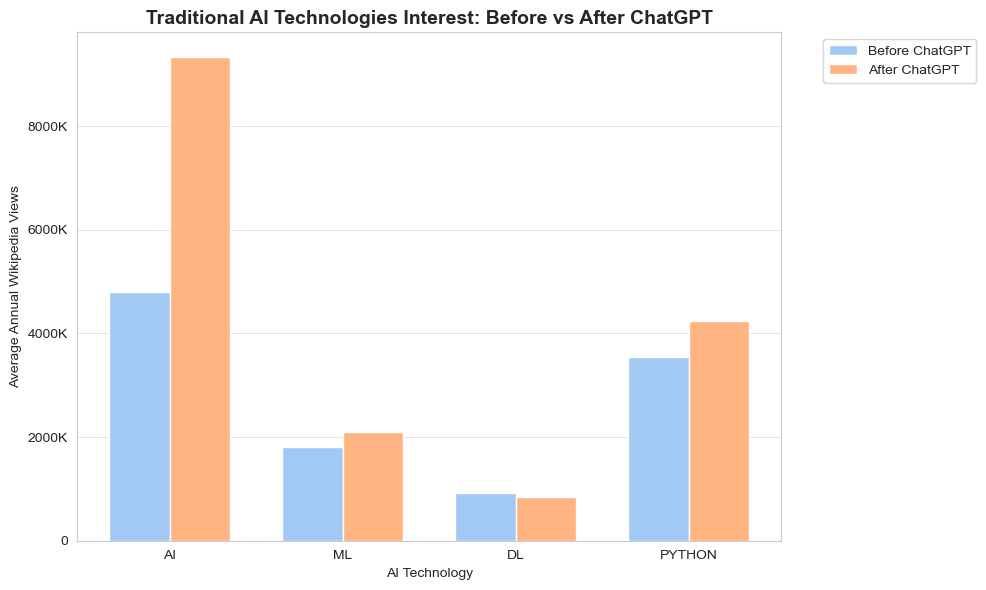

In [30]:
# Barplot: Before vs After for each term
plt.figure(figsize=(10, 6))
x = range(len(traditional_terms))
width = 0.35

plt.bar([i - width/2 for i in x], traditional_before, width, label='Before ChatGPT')
plt.bar([i + width/2 for i in x], traditional_after, width, label='After ChatGPT')

plt.xlabel('AI Technology')
plt.ylabel('Average Annual Wikipedia Views')
plt.title('Traditional AI Technologies Interest: Before vs After ChatGPT', fontsize=14, fontweight='bold')
plt.xticks(x, [term.upper() for term in traditional_terms])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.grid(True, axis='y', alpha=0.5)
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K' if x >= 1000 else f'{x:.0f}'))
plt.tight_layout();

**Key findings:**

Traditional AI technologies show mixed results following ChatGPT's emergence. Artificial Intelligence searches increased by 86.6%, demonstrating how ChatGPT amplified public interest in AI.

Machine Learning and Python showed moderate growth (15.2% and 19.8% respectively), indicating steady expansion in these established technologies. Deep Learning declined by 6.6%, possibly reflecting a shift in attention from technical details to more accessible AI applications.

ChatGPT has become the undisputed leader in AI-related searches(nearly 45M), with 2025 projections showing it surpassed all traditional technologies including Python in search volume, indicating massive public fascination with this revolutionary tool.

**Key insight:**
ChatGPT's release created an explosive effect and dramatically boosted general interest in AI. The focus shifted to artificial intelligence itself - a broad audience finally understood "what this is all about." This also increased interest in related areas, but with less intensity.

<div style="color: #095AAD; font-weight: bold; font-size: 15px;">
    
### 4. Data Science salary impact analysis</div>

Since ChatGPT represents breakthrough AI technology directly relevant to Data Science work, we now examine whether this revolutionary interest translates into actual salary growth for data professionals by comparing compensation before (2020-2022) vs after (2023-2025) ChatGPT release.

In [31]:
# Define periods: Before ChatGPT (2020-2022) vs After ChatGPT (2023-2025)
before_chatgpt_salary = df[df['work_year'].isin([2020, 2021, 2022])]
after_chatgpt_salary = df[df['work_year'].isin([2023, 2024, 2025])]

# Overall Data Science salary comparison
overall_salary_before = before_chatgpt_salary['salary_in_usd'].mean()
overall_salary_after = after_chatgpt_salary['salary_in_usd'].mean()
overall_growth = ((overall_salary_after - overall_salary_before) / overall_salary_before * 100)

print(f'\nOverall Data Science Salary Impact:\n')
print(f'Before ChatGPT (2020-2022): ${overall_salary_before:,.0f}')
print(f'After ChatGPT (2023-2025): ${overall_salary_after:,.0f}')
print(f'Growth: {overall_growth:.1f}%')


Overall Data Science Salary Impact:

Before ChatGPT (2020-2022): $123,364
After ChatGPT (2023-2025): $150,333
Growth: 21.9%


In [32]:
# Find AI-related professions in both periods
def is_ai_profession(job_title):
    ai_keywords = ['ai ', 'machine learning', 'deep learning', 'computer vision', 'nlp', 'llm', 'genai']
    return any(keyword in job_title.lower() for keyword in ai_keywords)
    
# AI-related professions analysis
ai_jobs_before = before_chatgpt_salary[before_chatgpt_salary['job_title'].apply(is_ai_profession)]
ai_jobs_after = after_chatgpt_salary[after_chatgpt_salary['job_title'].apply(is_ai_profession)]

print(f'\nAI-related professions analysis:\n')
print(f'Before ChatGPT: ${ai_jobs_before["salary_in_usd"].mean():,.0f}')
print(f'After ChatGPT: ${ai_jobs_after["salary_in_usd"].mean():,.0f}')

ai_growth = ((ai_jobs_after['salary_in_usd'].mean() - ai_jobs_before['salary_in_usd'].mean()) / ai_jobs_before['salary_in_usd'].mean() * 100)
print(f'AI professions salary growth: {ai_growth:.1f}%')

print(f'\nTop AI professions after ChatGPT:\n')
ai_top_salary = ai_jobs_after.groupby('job_title')['salary_in_usd'].mean().nlargest(5).reset_index()
ai_top_salary.columns = ['Job Title', 'Average Salary (USD)']
ai_top_salary['Average Salary (USD)'] = ai_top_salary['Average Salary (USD)'].round(0).astype(int)
ai_top_salary


AI-related professions analysis:

Before ChatGPT: $124,172
After ChatGPT: $180,438
AI professions salary growth: 45.3%

Top AI professions after ChatGPT:



,Job Title,Average Salary (USD)
0,Applied AI ML Lead,292500
1,Head of Machine Learning,281083
2,Machine Learning Performance Engineer,262500
3,Director of Machine Learning,254396
4,Machine Learning Model Engineer,230000


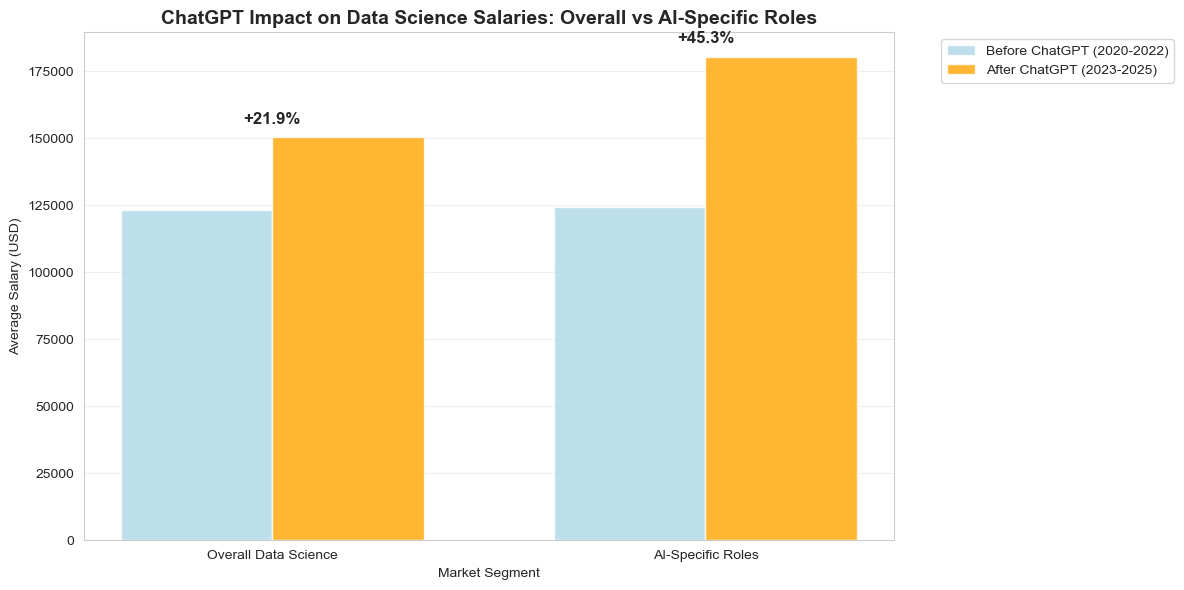

In [33]:
# Create comparison visualization
plt.figure(figsize=(12, 6))
x = range(2)
width = 0.35

plt.bar([0 - width/2, 1 - width/2], 
        [overall_salary_before, ai_jobs_before['salary_in_usd'].mean()], 
        width, label='Before ChatGPT (2020-2022)', alpha=0.8, color='lightblue')

plt.bar([0 + width/2, 1 + width/2], 
        [overall_salary_after, ai_jobs_after['salary_in_usd'].mean()], 
        width, label='After ChatGPT (2023-2025)', alpha=0.8, color='orange')

# Add growth percentages on top
plt.text(0, overall_salary_after + 5000, f'+{overall_growth:.1f}%', ha='center', fontweight='bold', fontsize=12)
plt.text(1, ai_jobs_after['salary_in_usd'].mean() + 5000, f'+{ai_growth:.1f}%', ha='center', fontweight='bold', fontsize=12)

plt.xlabel('Market Segment')
plt.ylabel('Average Salary (USD)')
plt.title('ChatGPT Impact on Data Science Salaries: Overall vs AI-Specific Roles', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Overall Data Science', 'AI-Specific Roles'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout();

**Key findings:**

ChatGPT's impact on Data Science salaries proved substantial but uneven. Overall salary growth reached 21.9%, demonstrating a positive effect across the entire industry.

AI-specific professions showed explosive growth of 45.3% - more than double the general trend. This gap demonstrates how ChatGPT's emergence differently affected various Data Science market segments.

Top AI positions command impressive salaries: Applied AI ML Lead earns 292,500 USD, while Head of Machine Learning receives 281,083 USD. These figures significantly exceed industry averages.

**Key insight:**
ChatGPT created a two-tier market in Data Science. General specialists received moderate salary increases, while AI-focused roles became a goldmine with premium compensation. The AI revolution transformed AI specialization into the most lucrative career path in the tech industry.

<div style="color: #095AAD; font-weight: bold; font-size: 16px;">
    
## Research Conclusion: Data Science Market Dynamics 2020-2025</div>

This comprehensive study examined Data Science salary patterns through three critical lenses: corporate characteristics, macroeconomic factors, and technological disruption, revealing a complex ecosystem where multiple forces shape compensation dynamics.

**Workplace & Professional Factors (Block 1)** 

Company characteristics significantly impact Data Science careers, but not always as expected. Medium-sized companies emerged as the compensation sweet spot, offering both highest average salaries and greatest growth potential. Remote work patterns vary dramatically by company size, with large organizations providing the most flexibility while medium companies maintain strong office-centric cultures. Career progression analysis revealed that emerging AI/governance specializations offer superior growth trajectories compared to traditional data science paths.

**Economic Foundation Impact (Block 2)** 

National economic development serves as the primary salary predictor, with countries having GDP per capita above $50k paying significantly more (20%+ premium) for Data Science talent. Surprisingly, education levels matter almost as much as raw economic output, while internet infrastructure showed minimal correlation with compensation. This confirms that fundamental economic strength and human capital investment drive tech salary premiums more than digital connectivity alone.

**AI Revolution Impact (Block 3)** 

ChatGPT's emergence created the most dramatic market shift, generating a two-tier compensation structure within Data Science. While general practitioners saw respectable 21.9% salary growth, AI-specialized roles exploded with 45.3% increases. Additionally, ChatGPT fueled mass interest in AI and significantly expanded the boundaries of the data field - both in perception and economic value.

**Strategic Implications** 

The data reveals that Data Science success requires strategic positioning across multiple dimensions. Geographic targeting toward high-GDP educated nations, company size optimization for medium-to-large organizations, and most critically, AI specialization represent the optimal career strategy. The convergence of economic development, corporate resources, and technological innovation creates premium opportunities for professionals who can navigate all three factors effectively.

The research demonstrates that Data Science has evolved from a singular profession into a diversified ecosystem where specialization, location, and timing determine earning potential more than traditional factors like experience alone.